<p style='text-align:center; font-size:x-large; font-weight:bold' > MFC project:  Predicating Car Prices</p>

In [19]:
try:   
    import os
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    from scipy import stats
    from typing import List
    file_path = '{}/auto.csv'.format(os.getcwd())
except Error as e:
    print(e)
    print('Error Importing libraries, trying again')
    import os
    import pandas as pd
    import numpy as np
    from typing import List
    import matplotlib.pyplot as plt
    import seaborn as sns
    from scipy import stats
    file_path = '{}/auto.csv'.format(os.getcwd())
    
    
df = pd.read_csv(file_path, header=None) 
    

In [20]:
headers = ['symboling','normalized-losses','make','fuel-type',"aspiration", 'num-of-doors','body-style',
         'drive-wheels','engine-location','wheel-base', 'length','width','height','curb-weight','engine-type',
         'num-of-cylinders', 'engine-size','fuel-system','bore','stroke','compression-ratio','horsepower',
         'peak-rpm','city-mpg','highway-mpg','price']

df.columns = headers
df.replace("?", np.nan, inplace = True)
test = df['price'].isnull()
# for i in test:
#     if i != False:
#         print(i)
def replace_NaN_with_mean(column_names:List[str]):
    for column in column_names:
        column_mean = df[column].astype('float').mean(axis=0)
        df[column].replace(np.nan, column_mean, inplace=True)
    pass

def replace_NaN_with_mode(column_names:List[str]):
    for column in column_names:
        column_mode = df[column].value_counts().idxmax()
        df[column].replace(np.nan, column_mode, inplace=True)


replace_by_mean = ['normalized-losses', 'stroke', 'bore', 'horsepower', 'peak-rpm']
replace_by_mode = ['num-of-doors']

replace_NaN_with_mean(replace_by_mean)
replace_NaN_with_mode(replace_by_mode)
df.dropna()
df.reset_index(drop=True, inplace=True)

#converting the columns to the right data types
df[['bore', 'stroke']] = df[['bore', 'stroke']].astype('float')
df[['normalized-losses']] = df[['normalized-losses']].astype('int')
df[['price']] = df[['price']].astype('float')
df[['peak-rpm']] = df[['peak-rpm']].astype('float')
df['horsepower']=df['horsepower'].astype(int, copy=True)

#normalising the height, length and width features down the 0-1 range
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['height'] = df['height']/df['height'].max()

# df.dropna(subset=['price'], axis=0)
df = df[df['price'].notna()]

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


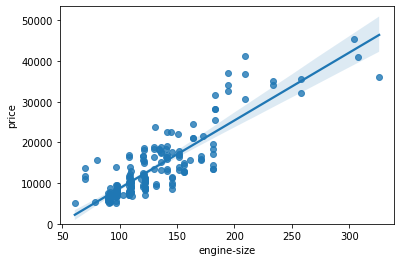

In [21]:
sns.regplot(x='engine-size', y='price', data=df)
plt.ylim(0,)
df[['engine-size', "price"]].corr()

,height,price
height,1.000000,0.135486
price,0.135486,1.000000


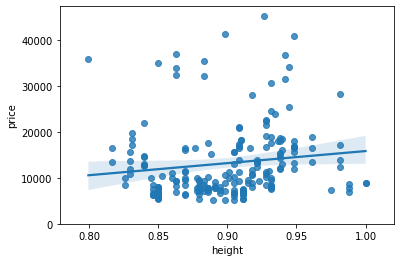

In [22]:
sns.regplot(x="height", y="price", data=df)
plt.ylim(0,)
df[['height', "price"]].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


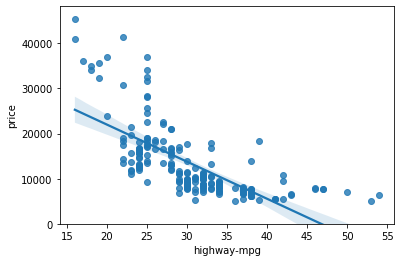

In [23]:
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)
df[['highway-mpg', "price"]].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


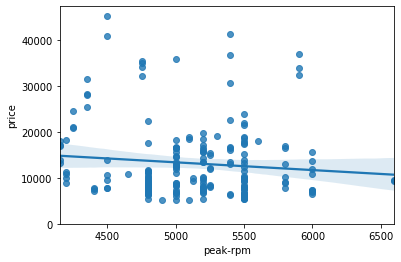

In [24]:
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)
df[['peak-rpm', 'price']].corr()

,stroke,price
stroke,1.000000,0.082269
price,0.082269,1.000000


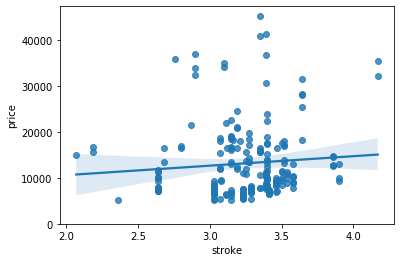

In [25]:
sns.regplot(x="stroke", y="price", data=df)
plt.ylim(0,)
df[['stroke', 'price']].corr()

,width,price
width,1.000000,0.751265
price,0.751265,1.000000


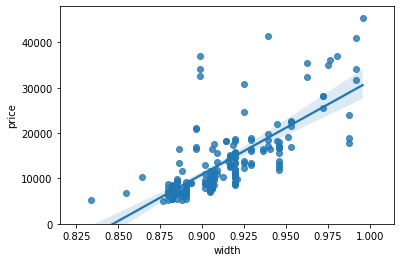

In [26]:
sns.regplot(x="width", y="price", data=df)
plt.ylim(0,)
df[['width', 'price']].corr()

(0, 47414.1)

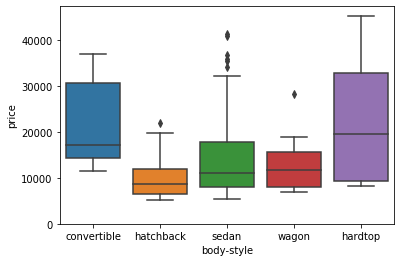

In [27]:
sns.boxplot(x="body-style", y="price", data=df)
plt.ylim(0,)

(0, 47414.1)

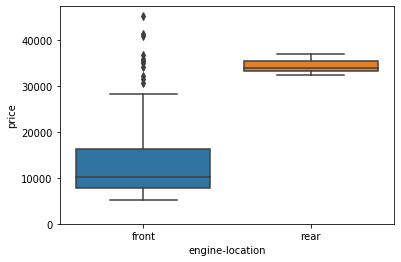

In [28]:
sns.boxplot(x='engine-location', y='price', data=df)
plt.ylim(0,)

(0, 47414.1)

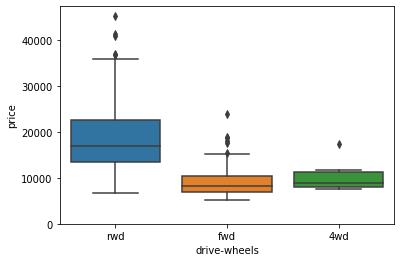

In [29]:
sns.boxplot(x='drive-wheels', y='price', data=df)
plt.ylim(0,)

In [30]:
df['drive-wheels'].unique()
df_group_one = df[['drive-wheels','body-style','price']]
df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False).mean()
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [31]:
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot = grouped_pivot.fillna(0)

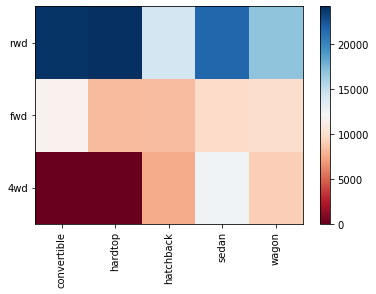

In [32]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [33]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print(f'Correlation:{pearson_coef} P.value:{p_value}')
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print(f'Correlation:{pearson_coef} P.value:{p_value}')
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print(f'Correlation:{pearson_coef} P.value:{p_value}')
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print(f'Correlation:{pearson_coef} P.value:{p_value}')
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print(f'Correlation:{pearson_coef} P.value:{p_value}')
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print(f'Correlation:{pearson_coef} P.value:{p_value}')
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print(f'Correlation:{pearson_coef} P.value:{p_value}')
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print(f'Correlation:{pearson_coef} P.value:{p_value}')
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print(f'Correlation:{pearson_coef} P.value:{p_value}')


Correlation:0.584641822265508 P.value:8.076488270733218e-20
Correlation:0.8096068016571054 P.value:6.273536270650504e-48
Correlation:0.6906283804483642 P.value:8.016477466158759e-30
Correlation:0.7512653440522672 P.value:9.20033551048217e-38
Correlation:0.8344145257702846 P.value:2.1895772388936914e-53
Correlation:0.8723351674455185 P.value:9.265491622198389e-64
Correlation:0.5431553832626602 P.value:8.049189483935489e-17
Correlation:-0.6865710067844677 P.value:2.321132065567674e-29
Correlation:-0.7046922650589529 P.value:1.7495471144477352e-31


In [34]:
'''
 since the drive wheels feature is the  only categorical variable with a correlation with the price, we use 
 one hot encoding for labelling it so our model understands. 
'''
dummy = pd.get_dummies(df["drive-wheels"])
df = pd.concat([df, dummy], axis=1)
df.drop("drive-wheels", axis = 1, inplace=True)

In [35]:
#finally, saving  the file for further use.  
df.to_csv('clean_auto.csv', index=False)